## Datasets
Our client is a credit card company. They have brought us a dataset that includes some demographics and recent financial data (the past six months) for a sample of 30,000 of their account holders. This data is at the credit account level; in other words, there is one row for each account (you should always clarify what the definition of a row is, in a dataset). Rows are labeled by whether in the next month after the six month historical data period, an account owner has defaulted, or in other words, failed to make the minimum payment

### Problem statement
Your goal is to develop a predictive model for whether an account will default next month, given demographics and historical data.You will developed the practical application of the model.

### Task 1
#### Data exploration and cleaning

In [2]:
import pandas as pd 
from pandas import Series,DataFrame
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_excel("C:\\Users\\KIIT\\Desktop\\default_of_credit_card_clients.xls")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df["default payment next month"].value_counts()

0    23438
1     6562
Name: default payment next month, dtype: int64

In [5]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [6]:
df["EDUCATION"].value_counts()

2    13884
1    10474
3     4867
0      329
5      275
4      122
6       49
Name: EDUCATION, dtype: int64

In [7]:
# Here education having different categories 1 basically indicates the lower school , 2 basically indicates the high school , 3 
# basiclly indicates college and 4 indicates the university but zero and 5,6 dont have any information.

In [8]:
df["EDUCATION"]=df["EDUCATION"].map({0:4,1:1,2:2,3:3,4:4,5:4,6:4})

In [9]:
df["MARRIAGE"].value_counts()

2    15810
1    13503
0      369
3      318
Name: MARRIAGE, dtype: int64

In [10]:
# marraige 0 dont have any information
df["MARRIAGE"]=df["MARRIAGE"].map({0:0,1:1,2:2,3:3})

In [11]:
df.dtypes

ID                            object
LIMIT_BAL                      int64
SEX                            int64
EDUCATION                      int64
MARRIAGE                       int64
AGE                            int64
PAY_1                         object
PAY_2                          int64
PAY_3                          int64
PAY_4                          int64
PAY_5                          int64
PAY_6                          int64
BILL_AMT1                      int64
BILL_AMT2                      int64
BILL_AMT3                      int64
BILL_AMT4                      int64
BILL_AMT5                      int64
BILL_AMT6                      int64
PAY_AMT1                       int64
PAY_AMT2                       int64
PAY_AMT3                       int64
PAY_AMT4                       int64
PAY_AMT5                       int64
PAY_AMT6                       int64
default payment next month     int64
dtype: object

In [12]:
df['PAY_1'].value_counts()

0                13402
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [13]:
df['PAY_1']=np.where(df['PAY_1']=='Not available',0,df['PAY_1'])

In [14]:
df['PAY_1']=df['PAY_1'].astype(int)

In [15]:
# Id column doesnt require
df.drop('ID',axis=1,inplace=True)

In [16]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [17]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

### Task 2

### Data analysis and visulaization

In [18]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [19]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,165760.989333,1.586500,1.864767,1.535900,35.108800,-0.015800,-0.132867,-0.164333,-0.219300,-0.263900,...,42791.362167,39884.398167,38480.350933,5613.321500,5.855410e+03,5174.387967,4776.089733,4754.749200,5164.223267,0.218733
std,130158.590432,0.513348,0.772290,0.542698,9.851592,1.062287,1.191215,1.191096,1.162348,1.127519,...,64090.316188,60606.644833,59406.836932,16539.094312,2.299256e+04,17565.538305,15532.893047,15239.070708,17712.664703,0.413394
min,0.000000,0.000000,1.000000,0.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2034.000000,1534.000000,1080.000000,836.000000,7.217500e+02,371.000000,223.000000,170.750000,9.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18759.500000,17835.500000,16643.000000,2084.500000,2.000000e+03,1776.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,53572.250000,49804.000000,48863.500000,5000.000000,5.000000e+03,4500.000000,4000.000000,4000.000000,4000.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [20]:
df.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1.000000,0.064827,-0.258013,-0.064176,0.182063,-0.257358,-0.294889,-0.285132,-0.267011,-0.250228,...,0.299959,0.301221,0.295882,0.198029,0.180293,0.212039,0.206124,0.219416,0.222307,-0.144928
SEX,0.064827,1.000000,-0.078412,0.063636,0.037687,-0.053487,-0.069787,-0.067032,-0.062984,-0.059243,...,0.001972,0.006099,0.005955,0.011086,0.006681,0.000921,0.007582,0.008086,0.007034,-0.020674
EDUCATION,-0.258013,-0.078412,1.000000,-0.219344,0.057042,0.102836,0.128088,0.122278,0.117282,0.106551,...,-0.026375,-0.032076,-0.031475,-0.050031,-0.039524,-0.051557,-0.047781,-0.053016,-0.051544,0.017165
MARRIAGE,-0.064176,0.063636,-0.219344,1.000000,-0.260869,0.018388,0.019599,0.026609,0.025877,0.026297,...,-0.002899,-0.004749,-0.000814,0.004695,-0.000599,0.005678,-0.002071,0.008143,0.002587,-0.007812
AGE,0.182063,0.037687,0.057042,-0.260869,1.000000,-0.039696,-0.051320,-0.054312,-0.054143,-0.059697,...,0.072791,0.070412,0.068698,0.037162,0.030057,0.038603,0.031665,0.032437,0.028715,0.032733
PAY_1,-0.257358,-0.053487,0.102836,0.018388,-0.039696,1.000000,0.640735,0.546380,0.510865,0.481862,...,0.168934,0.170275,0.167294,-0.077612,-0.063771,-0.067422,-0.062196,-0.054100,-0.057365,0.308162
PAY_2,-0.294889,-0.069787,0.128088,0.019599,-0.051320,0.640735,1.000000,0.766654,0.662036,0.622828,...,0.221573,0.220225,0.218184,-0.081180,-0.059235,-0.055260,-0.047475,-0.036893,-0.036493,0.262028
PAY_3,-0.285132,-0.067032,0.122278,0.026609,-0.054312,0.546380,0.766654,1.000000,0.777385,0.686876,...,0.226350,0.223815,0.220949,0.000531,-0.066928,-0.052821,-0.046875,-0.035849,-0.036039,0.233518
PAY_4,-0.267011,-0.062984,0.117282,0.025877,-0.054143,0.510865,0.662036,0.777385,1.000000,0.819819,...,0.244728,0.241327,0.237627,-0.010280,-0.002846,-0.068932,-0.044371,-0.033716,-0.026797,0.215199
PAY_5,-0.250228,-0.059243,0.106551,0.026297,-0.059697,0.481862,0.622828,0.686876,0.819819,1.000000,...,0.270516,0.268009,0.260620,-0.006814,-0.004189,0.009310,-0.058935,-0.033887,-0.023821,0.201941


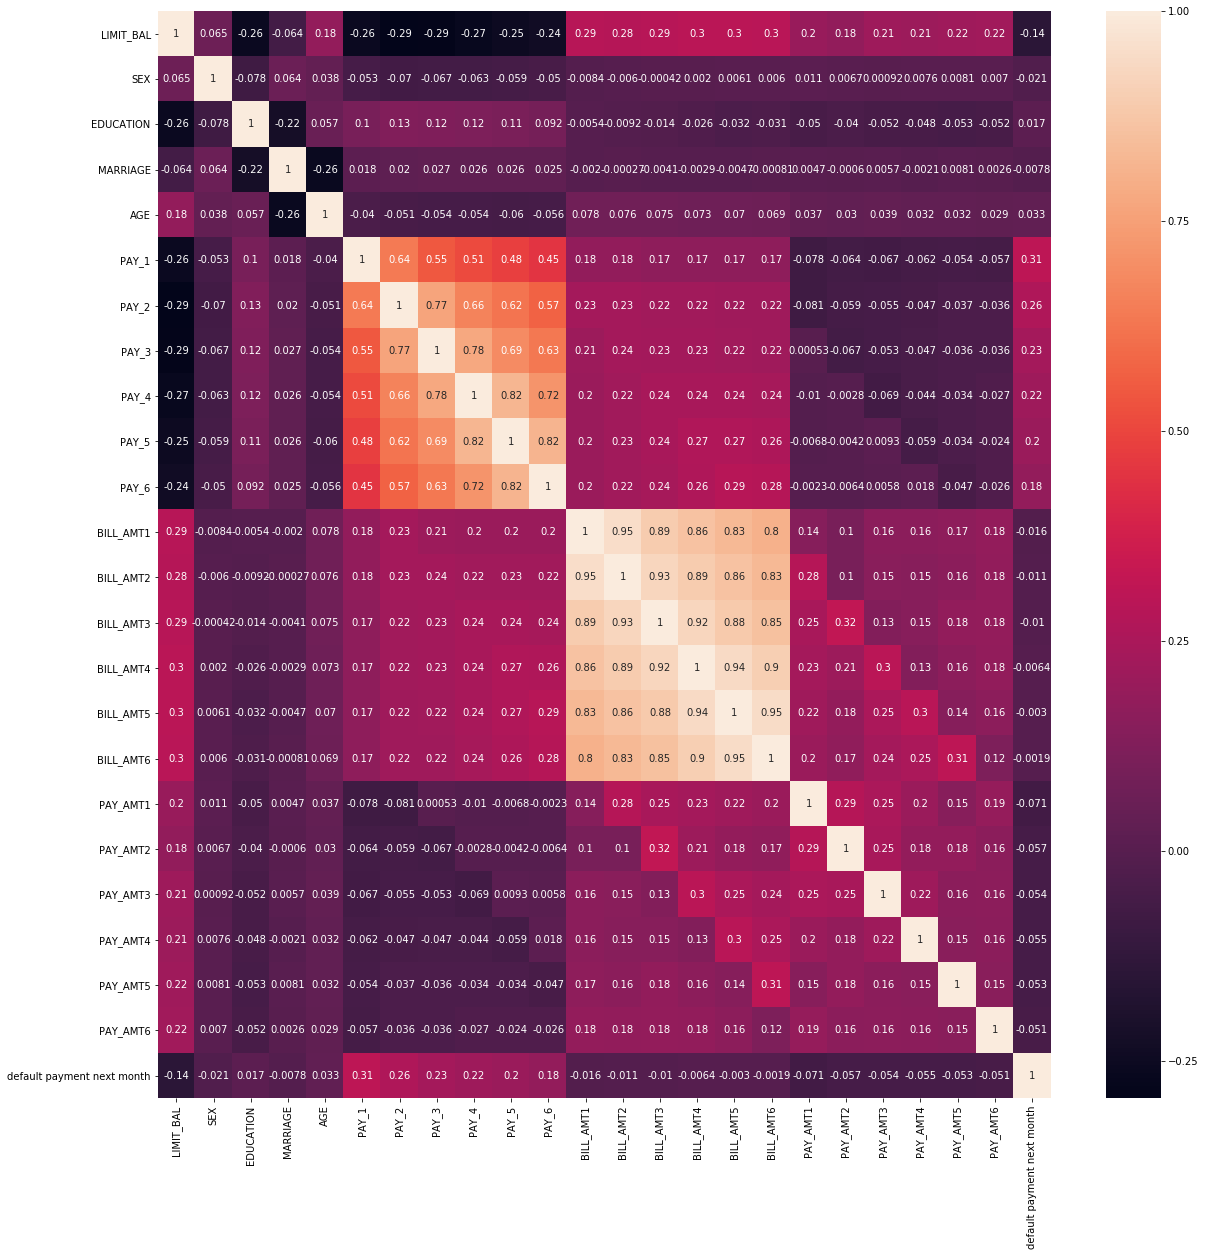

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

So here we observe from the above heatmap that PAY1,PAY2,PAY3,PAY4...,BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6' are highly correlated as it has dark color

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019F5EBDC048>,
      dtype=object)

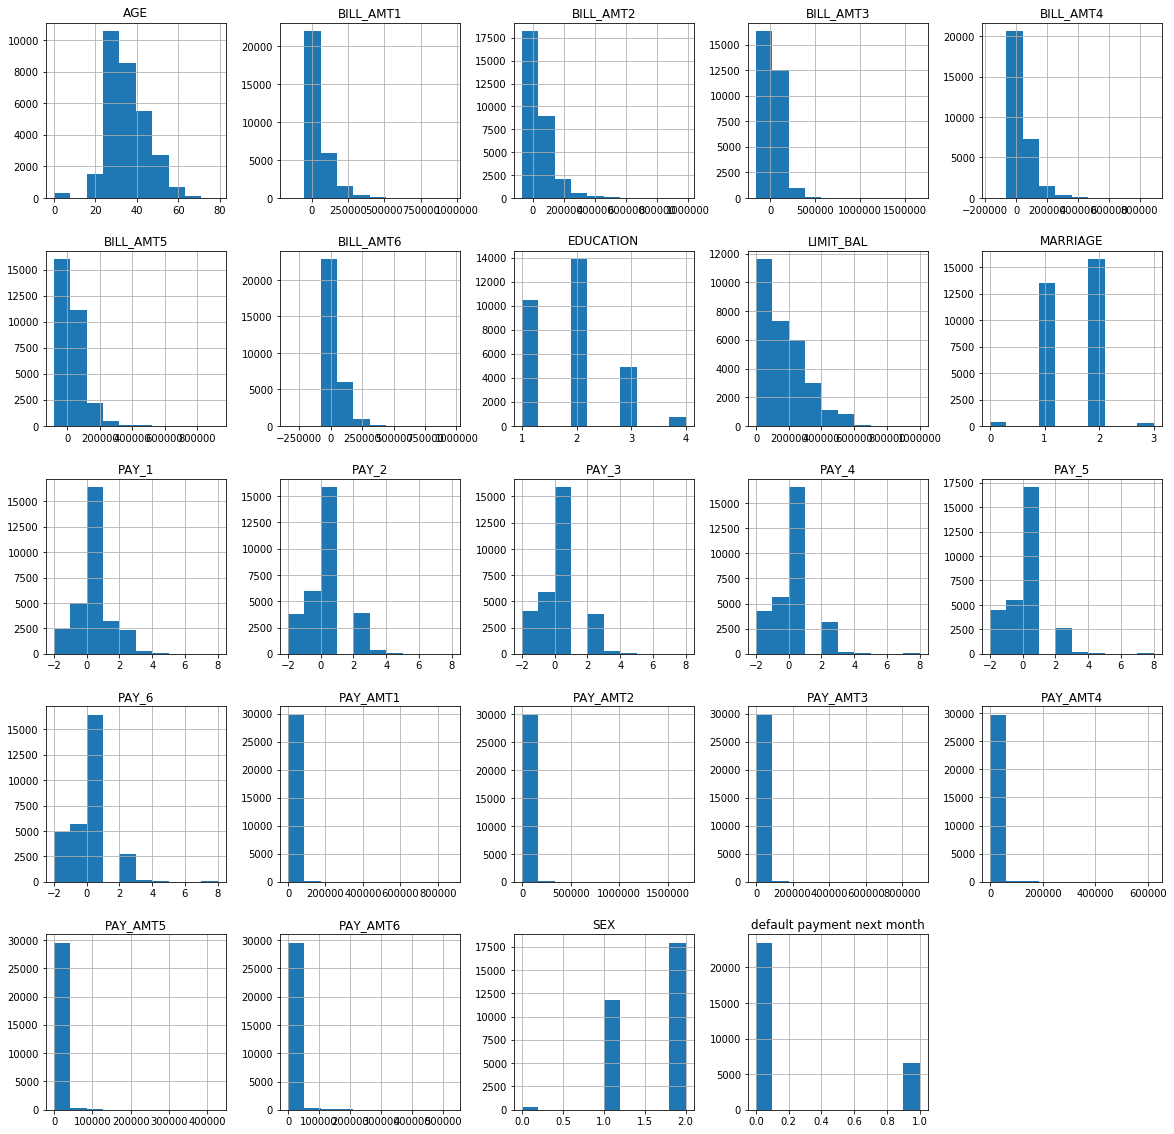

In [21]:
df.hist(figsize=(20,20))

In [22]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

### TASK 3


#### Prediction by using Logistic Regression

In [22]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [23]:
x_df=df.iloc[:,:-1]

In [24]:
x_df.drop("EDUCATION",inplace=True,axis=1)

In [25]:
y_df=df[["default payment next month"]]

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x_df,y_df,test_size=0.3,random_state=101)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr=LogisticRegression()

### Task 4

In [31]:
lr.fit(x_train,y_train)

D:\Python\Software\Anaconda_new1\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_pred_prob=lr.predict_proba(x_test)

In [33]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [34]:
print("roc_auc_score:{}".format(roc_auc_score(y_test,y_pred_prob[:,1])))

roc_auc_score:0.7078863541938953


In [35]:
tpr,fpr,threshold=roc_curve(y_test,y_pred_prob[:,0])

In [36]:
threshold

array([1.9994283 , 0.9994283 , 0.99539424, ..., 0.0209835 , 0.00860931,
       0.00654944])

In [37]:
accuracy=[]
for thresh in threshold:
    final_pred=np.where(y_pred_prob>thresh,1,0)
  

In [38]:
final_pred

array([[1, 1],
       [1, 1],
       [1, 1],
       ...,
       [1, 1],
       [1, 1],
       [1, 1]])

In [39]:
auc_score=roc_auc_score(y_test,final_pred[:,1])

In [40]:
print("roc_auc_score",auc_score)

roc_auc_score 0.5005169099838606


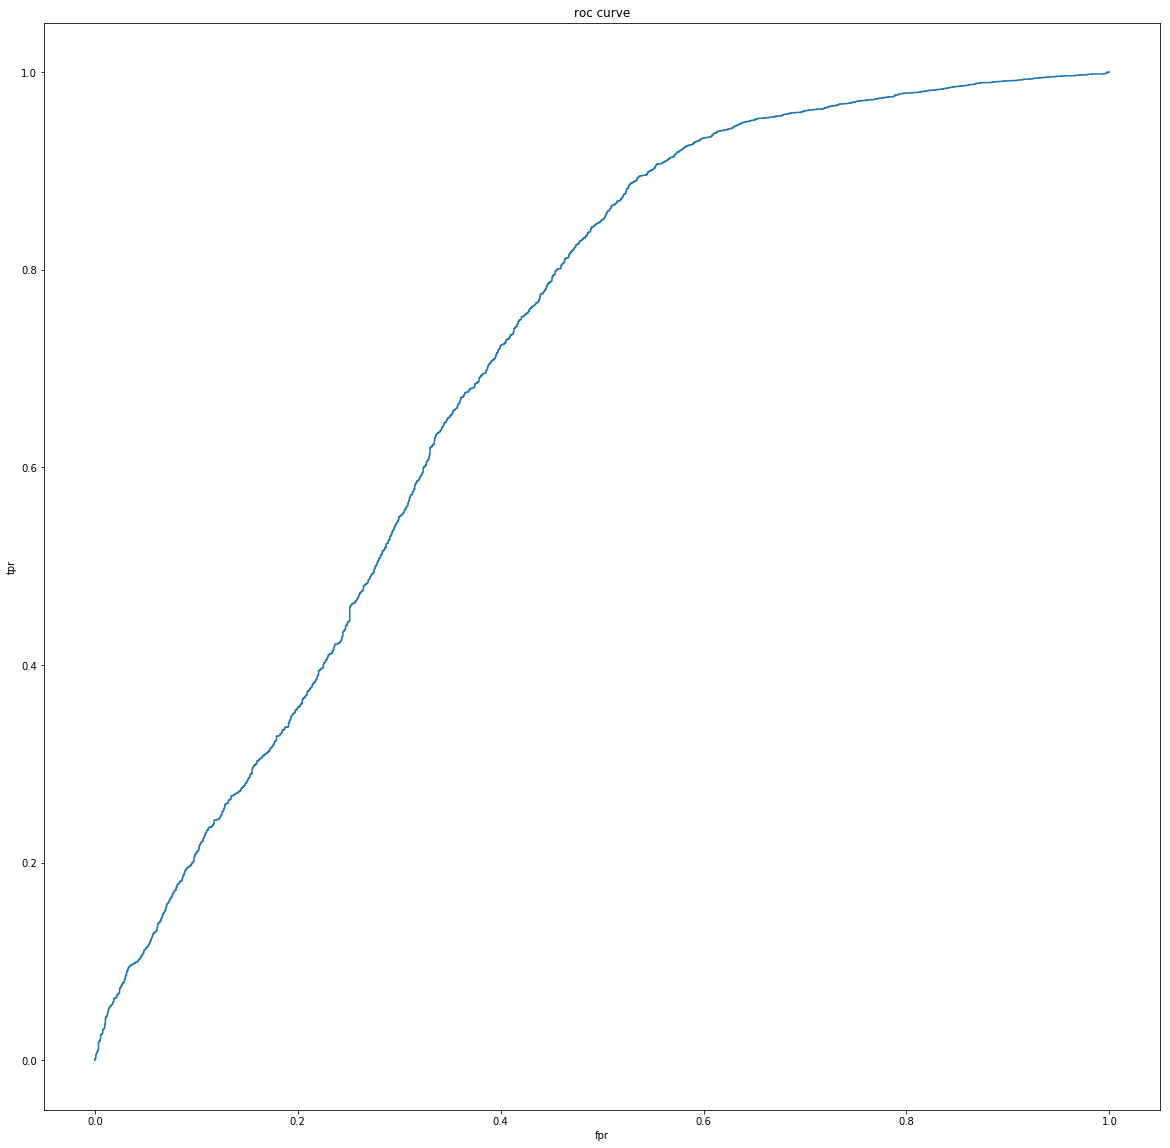

In [41]:
plt.figure(figsize=(20,20))
plt.plot(fpr,tpr,          label="tpr-fpr(Area=%.2f)"  % auc_score)
plt.title("roc curve")
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

As the area under the curve is very 0.70 so the value is high so the model is good as we know that the more the area under the curve better is the model

### In some cases ROC-AUC curve is not helpful for the goodness of the model so we use Precison-recall curve

In [42]:
## precision recall curve 
precision,recall,threshold=precision_recall_curve(y_test,y_pred_prob[:,0])

In [43]:
y_pred=lr.predict(x_test)

In [44]:
f1=f1_score(y_test,y_pred)

In [45]:
f1

0.32574850299401203

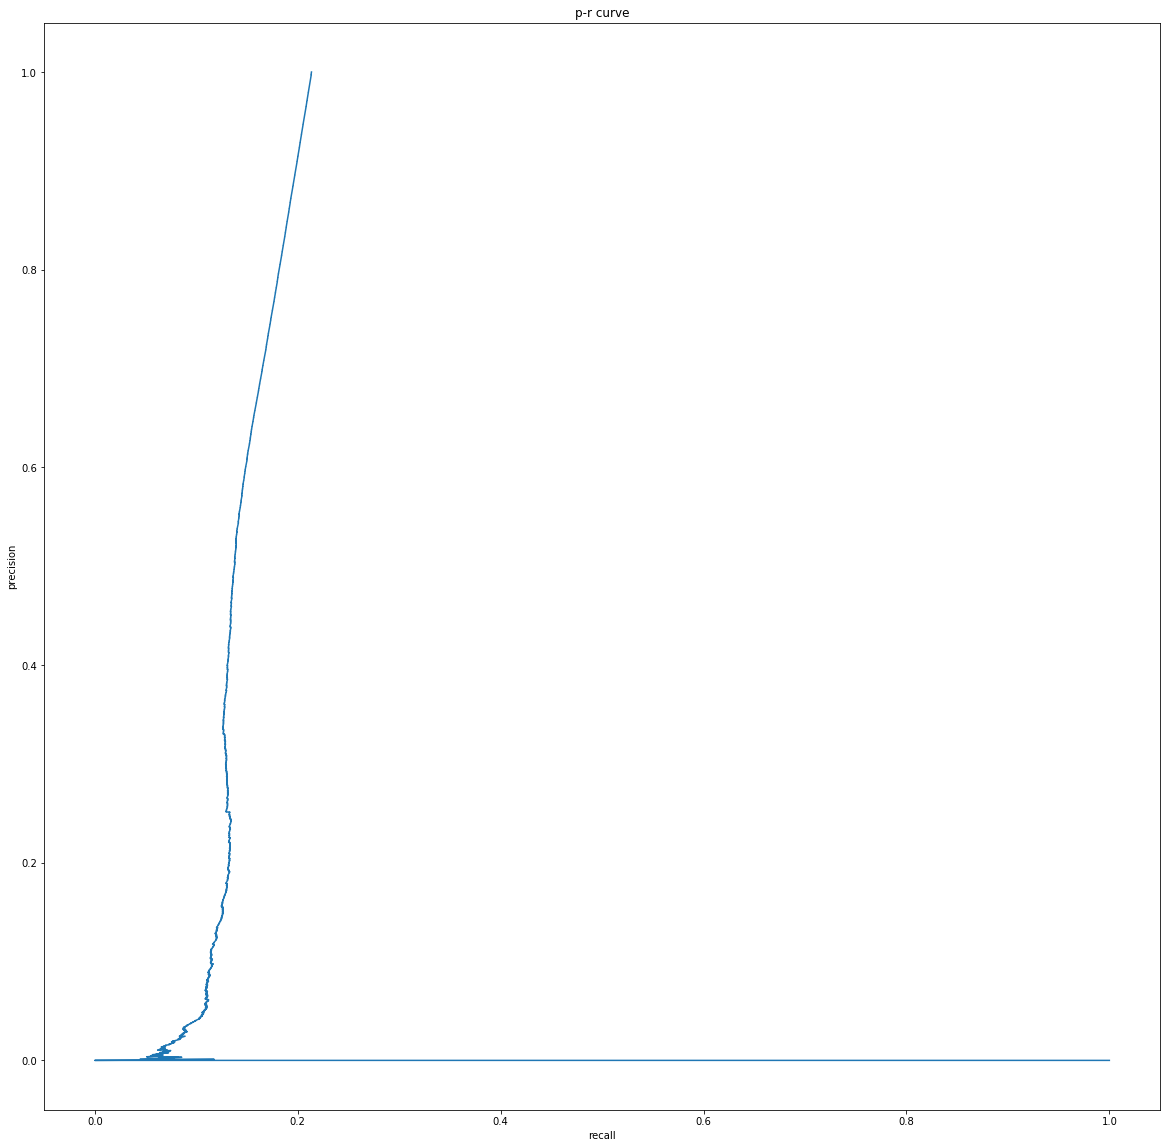

In [46]:
plt.figure(figsize=(20,20))
plt.plot(precision,recall,label="prec_recall(Area = %.2f)" %f1)
plt.xlabel("recall")
plt.ylabel("precision")
plt.title("p-r curve")
plt.show()

In [47]:
y_pred=lr.predict(x_test)

In [48]:
score=accuracy_score(y_test,y_pred)

In [49]:
score

0.8123333333333334

## Task 5

## cross validation

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
score=cross_val_score(lr,X=x_train,y=y_train,scoring="roc_auc",cv=5)

D:\Python\Software\Anaconda_new1\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Python\Software\Anaconda_new1\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Python\Software\Anaconda_new1\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Python\Software\Anaconda_new1\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

In [101]:
score.mean()

0.7180395242285643

### Task 6

## Decision tree model

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
from sklearn import tree

In [54]:
clf=DecisionTreeClassifier()

In [55]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [56]:
tree_pred=clf.predict(x_test)

In [57]:
clf.score(x_test,y_test)

0.7264444444444444

## Hyper parameter tunning

In [58]:
from sklearn.model_selection import RandomizedSearchCV

In [76]:
splitter=['best','random']
criterion=['gini','entropy']
max_features=['auto','sqrt','log2']
max_depth=[int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]


In [77]:
random_grid={
    'splitter':splitter,
    'criterion':criterion,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}
print(random_grid)

{'splitter': ['best', 'random'], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [61]:
search=RandomizedSearchCV(estimator=clf, param_distributions=random_grid,scoring="accuracy",cv=5,n_jobs=-1)

In [62]:
search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [63]:
search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=780, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [64]:
search.best_params_

{'splitter': 'random',
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': 'auto',
 'max_depth': 780,
 'criterion': 'gini'}

In [65]:
search.best_score_

0.805952380952381

In [66]:
clf=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=340, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [67]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=340, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [68]:
tree_pred=clf.predict(x_test)

In [69]:
tree_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
clf.score(x_test,y_test)

0.8036666666666666

[Text(564.626,1078.57,'X[8] <= 4.837\ngini = 0.344\nsamples = 21000\nvalue = [16360, 4640]'),
 Text(562.639,1047.31,'X[8] <= -0.152\ngini = 0.343\nsamples = 20953\nvalue = [16350, 4603]'),
 Text(129.46,1016.04,'X[7] <= 1.391\ngini = 0.292\nsamples = 7035\nvalue = [5786, 1249]'),
 Text(127.472,984.78,'X[1] <= -0.017\ngini = 0.287\nsamples = 6860\nvalue = [5668, 1192]'),
 Text(53.0326,953.517,'X[18] <= 2.252\ngini = 0.301\nsamples = 2484\nvalue = [2026, 458]'),
 Text(38.5014,922.254,'X[3] <= 1.55\ngini = 0.304\nsamples = 2437\nvalue = [1982, 455]'),
 Text(18.3813,890.991,'X[16] <= 0.08\ngini = 0.294\nsamples = 2233\nvalue = [1834, 399]'),
 Text(3.97434,859.729,'X[6] <= 0.68\ngini = 0.32\nsamples = 1882\nvalue = [1505, 377]'),
 Text(1.98717,828.466,'gini = 0.312\nsamples = 1823\nvalue = [1471, 352]'),
 Text(5.96151,828.466,'X[7] <= -1.176\ngini = 0.488\nsamples = 59\nvalue = [34, 25]'),
 Text(3.97434,797.203,'gini = 0.5\nsamples = 16\nvalue = [8, 8]'),
 Text(7.94868,797.203,'X[2] <= -0.64

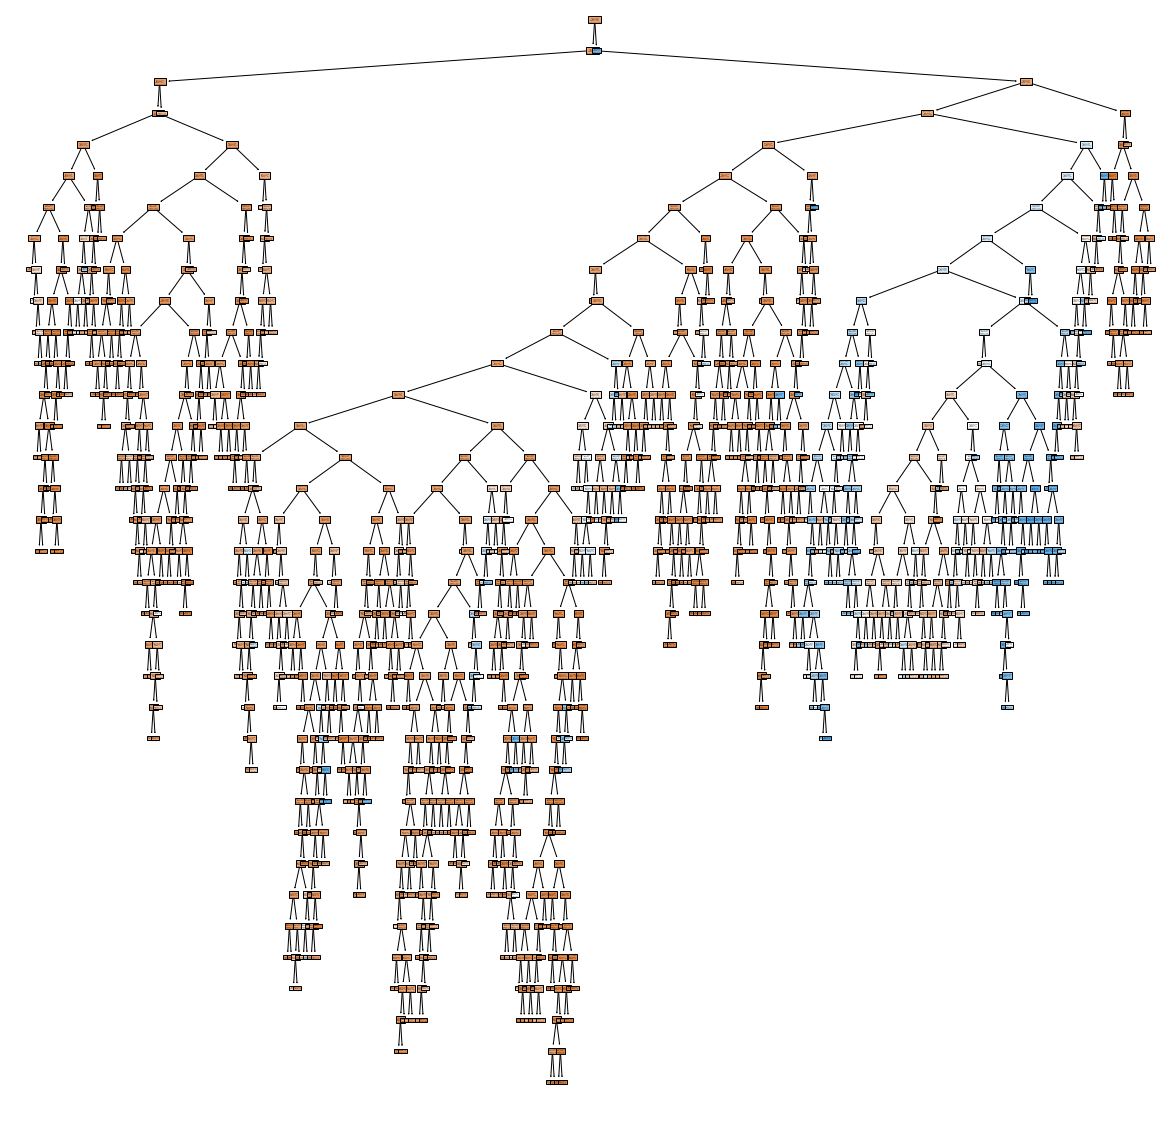

In [123]:
plt.figure(figsize=(20,20))
tree.plot_tree(clf,filled=True)

#### pcolormesh visualization of the mean testing score for each combination of hyperparameters

#### Feature Importance

In [92]:
from sklearn.ensemble import ExtraTreesRegressor

In [93]:
ex=ExtraTreesRegressor()

In [94]:
ex.fit(x_df,y_df)

C:\Users\KIIT\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [96]:
ex.feature_importances_

array([0.07036967, 0.02066855, 0.02761029, 0.08133254, 0.10165158,
       0.05721629, 0.03429914, 0.02901084, 0.02536916, 0.02908051,
       0.05080881, 0.04350164, 0.04100914, 0.03997596, 0.03988184,
       0.04168518, 0.0443706 , 0.04258074, 0.04405792, 0.04102442,
       0.04406583, 0.05042936])

In [97]:
imp_df=pd.DataFrame(ex.feature_importances_,columns=["imp_features"])
clf_df=pd.DataFrame(df.columns)

In [107]:
imp_fea_df=pd.concat([imp_df,clf_df],axis=1)
imp_fea_df.columns=["value","imp_features"]
imp_fea_df.sort_values(by='imp_features',ascending=True)

,value,imp_features
4,0.101652,AGE
11,0.043502,BILL_AMT1
12,0.041009,BILL_AMT2
13,0.039976,BILL_AMT3
14,0.039882,BILL_AMT4
15,0.041685,BILL_AMT5
16,0.044371,BILL_AMT6
2,0.027610,EDUCATION
0,0.070370,LIMIT_BAL
3,0.081333,MARRIAGE


### RandomForest Model

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
forest_clf=RandomForestClassifier()

In [66]:
forest_clf.fit(x_train,y_train)

C:\Users\KIIT\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:
y_pred=forest_clf.predict(x_test)

In [68]:
y_pred


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [69]:
forest_clf.score(x_test,y_test)

0.8161111111111111

In [70]:
### Hyperparameter tunning
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]
random_grids = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grids)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [72]:
random_search=RandomizedSearchCV(estimator=forest_clf, param_distributions=random_grids,scoring="accuracy",cv=5,n_jobs=-1)

In [73]:
random_search.fit(x_train,y_train)

D:\Python\Software\Anaconda_new1\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [74]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [75]:
rf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
rf.fit(x_train,y_train)

C:\Users\KIIT\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [77]:
predict=rf.predict(x_test)

In [78]:
rf.score(x_test,y_test)

0.824

In [79]:
from sklearn.metrics import classification_report,confusion_matrix

In [81]:
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

[[6776  302]
 [1282  640]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7078
           1       0.68      0.33      0.45      1922

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.67      9000
weighted avg       0.81      0.82      0.80      9000

